# Voice recognistion

Libraries: librosa, dtw

### Compute the MFCCs of two signals from the same person

In [7]:
file1 = "273083_23_M_10_2"
file2 = "273083_23_M_13_3"

def read_signals(file1, file2) :
    with open(file1 + '.txt') as f:
        words1 = [l.replace('\n', '') for l in f.readlines()]
        labels = [l[l.replace('\t', 'XX', 1).find('\t'):] for l in words1]
        words1 = [l.split('\t') for l in words1]
    
    with open(file2 + '.txt') as f:
        words2 = [l.replace('\n', '') for l in f.readlines()]
        words2 = [l.split('\t') for l in words2]
        
    return words1, words2, labels
    
words1, words2, labels = read_signals(file1, file2)
print(labels)

['ZAPAL', 'SWIATLO', 'W', 'KUCHNI', 'OTWORZ', 'DRZWI', 'DO', 'GARAZU', 'WLACZ', 'ZMYWARKE', 'WYLACZ', 'TELEWIZOR', 'PODNIES', 'ROLETY', 'W', 'SYPIALNI', 'ZAMKNIJ', 'BRAME', 'ZWIEKSZ', 'OGRZEWANIE', 'O', 'JEDEN', 'STOPIEN', 'ZAKREC', 'WODE', 'W', 'LAZIENCE', 'USTAW', 'ALARM', 'PRZYCISZ', 'RADIO', 'ZMIEN', 'KANAL', 'PODLEJ', 'KWIATKI', 'ZAPARZ', 'KAWE', 'WYLACZ', 'ALARM', 'W', 'GARAZU', 'ZAGOTUJ', 'WODE']


In [10]:
import librosa
import librosa.display

mfccs1 = []
mfccs2 = []

words_analyse = 20

def compute_mfcc(file1, file2, length) :
    for i in range(length) :
        y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
        mfccs1.append(librosa.feature.mfcc(y1, sr1))
        y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
        mfccs2.append(librosa.feature.mfcc(y2, sr2))
        
    return mfccs1, mfccs2

mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)

### Compare signals using DTW

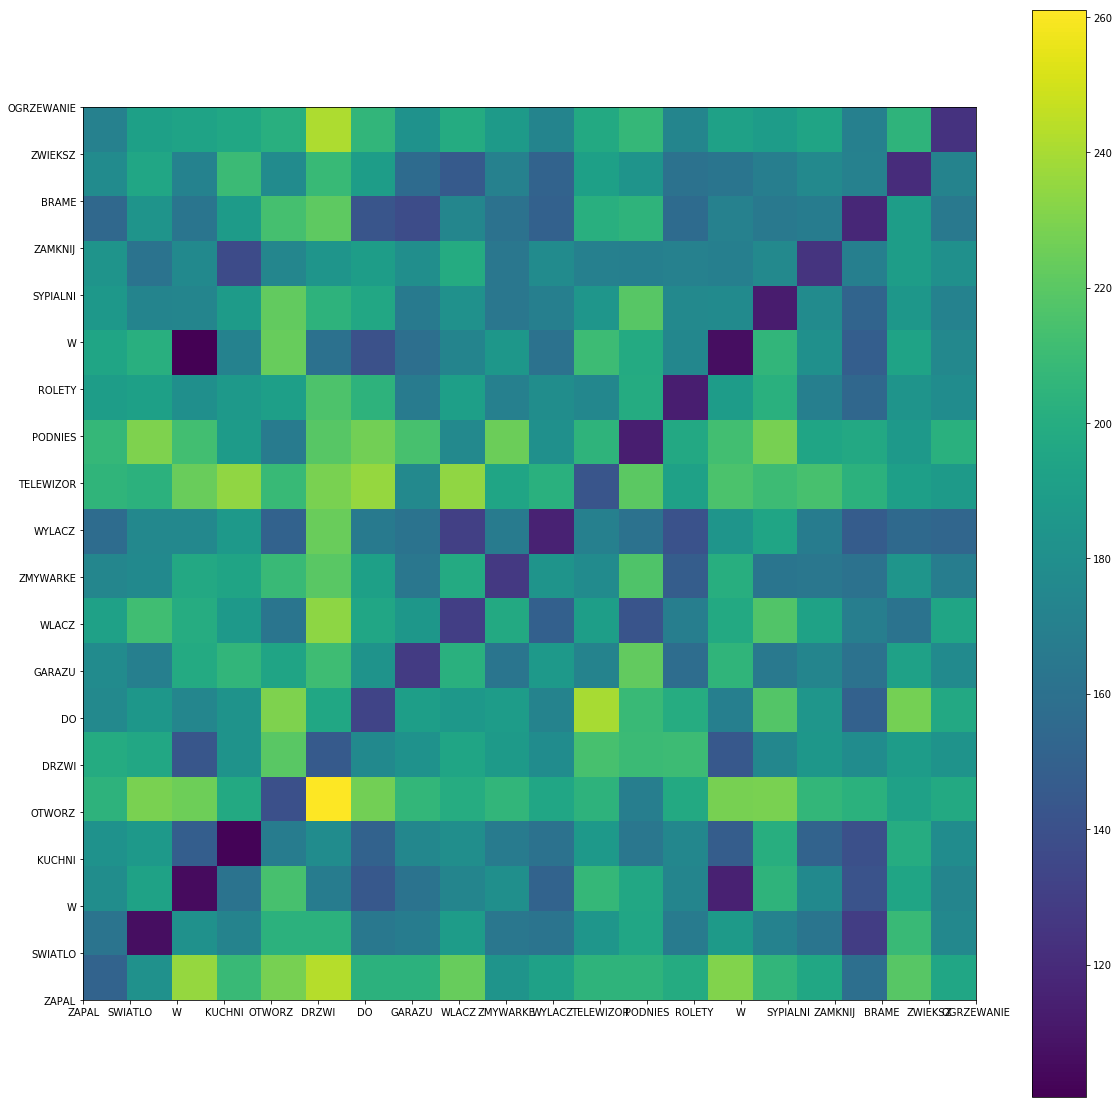

In [11]:
from numpy.linalg import norm
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt

def draw_matrix(features1, features2, words, labels, length) :
    odl = []
    for i in range(length) :
        vec = []
        for j in range(length) :
            dist, cost, acc_cost, path = dtw(features1[i].T, features2[j].T, dist=lambda x, y: norm(x - y, ord=1))
            vec.append(dist)
        odl.append(vec)
    
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    im = ax.imshow(odl, extent=[0,length-1,0,length-1], origin='lower', interpolation='None', cmap='viridis')
    labels = []
    for i in range(length) :
        labels.append(words[i][2])
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    fig.set_size_inches(20, 20, forward=True)

    fig.colorbar(im)
    plt.show()
    
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)

### Calculate recognistion rate for MFCCs of the same person

In [12]:
def recon_rate(features1, features2):

    good = 0
    for i in range(words_analyse) :
    #print(words1[i][2])
        dist, cost, acc_cost, path = dtw(features1[i].T, features2[0].T, dist=lambda x, y: norm(x - y, ord=1))
        minimum = dist;
        min_idx = 0;
    #print(str(dist) + " " + words1[0][2])
        for j in range(1, words_analyse-1) :
            dist, cost, acc_cost, path = dtw(features1[i].T, features2[j].T, dist=lambda x, y: norm(x - y, ord=1))
        #print(str(dist) + " " + words1[j][2])
            if minimum > dist :
                minimum = dist
                min_idx = j
        if(words1[i][2] == words1[min_idx][2]) :
            good = good + 1
        print(words1[i][2] + " ==> " + words2[min_idx][2])
        
    print("Recognition rate: " + str((good/words_analyse)*100) + "%")
    
recon_rate(mfccs1, mfccs2)

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> W
DO ==> DO
GARAZU ==> GARAZU
WLACZ ==> WLACZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> BRAME
Recognition rate: 90.0%


### Calculate recognistion rate for MFCCs of the same person for another signal pairs

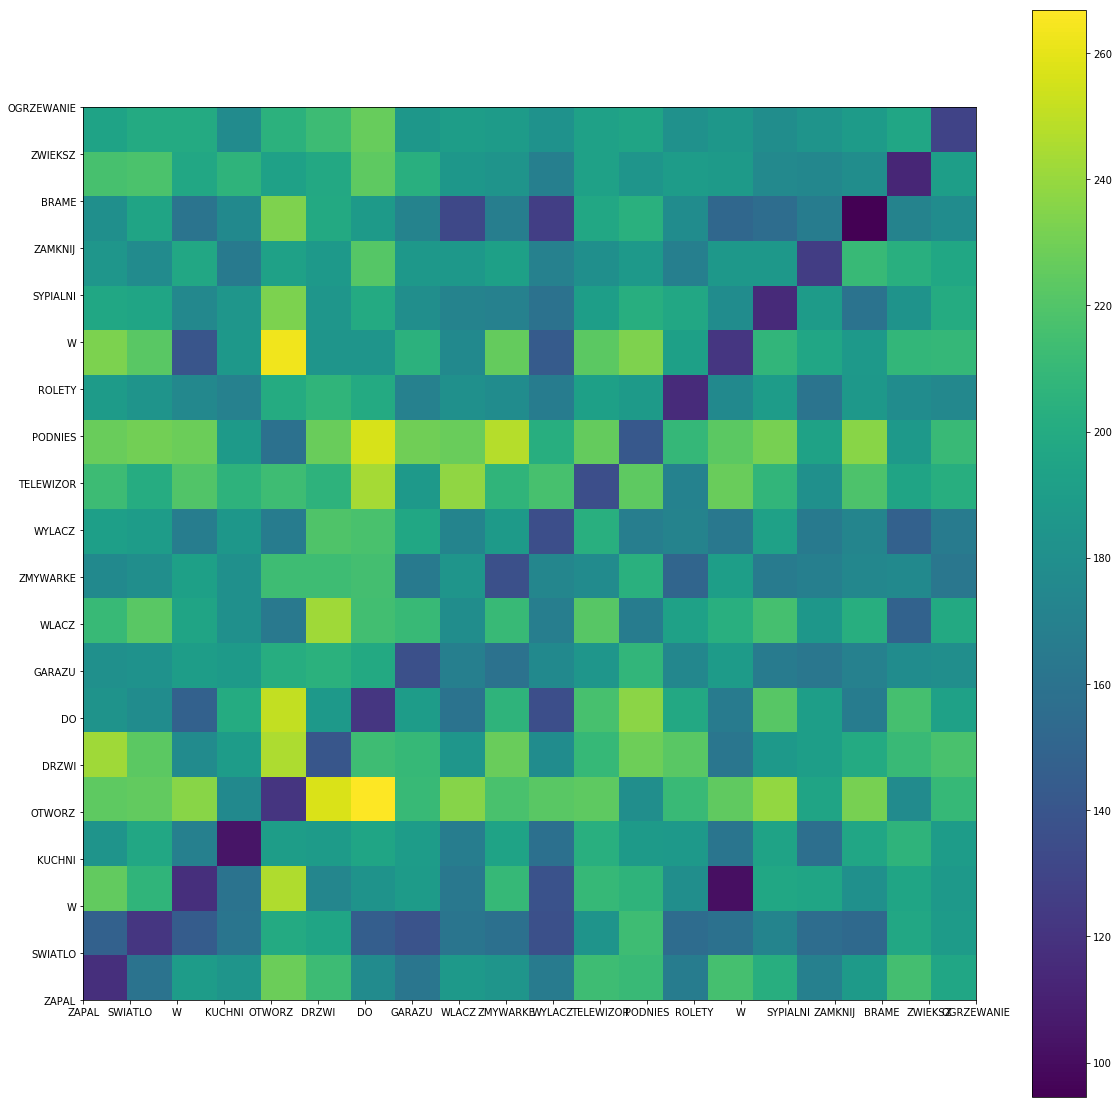

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> DO
GARAZU ==> GARAZU
WLACZ ==> ZWIEKSZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> KUCHNI
Recognition rate: 90.0%


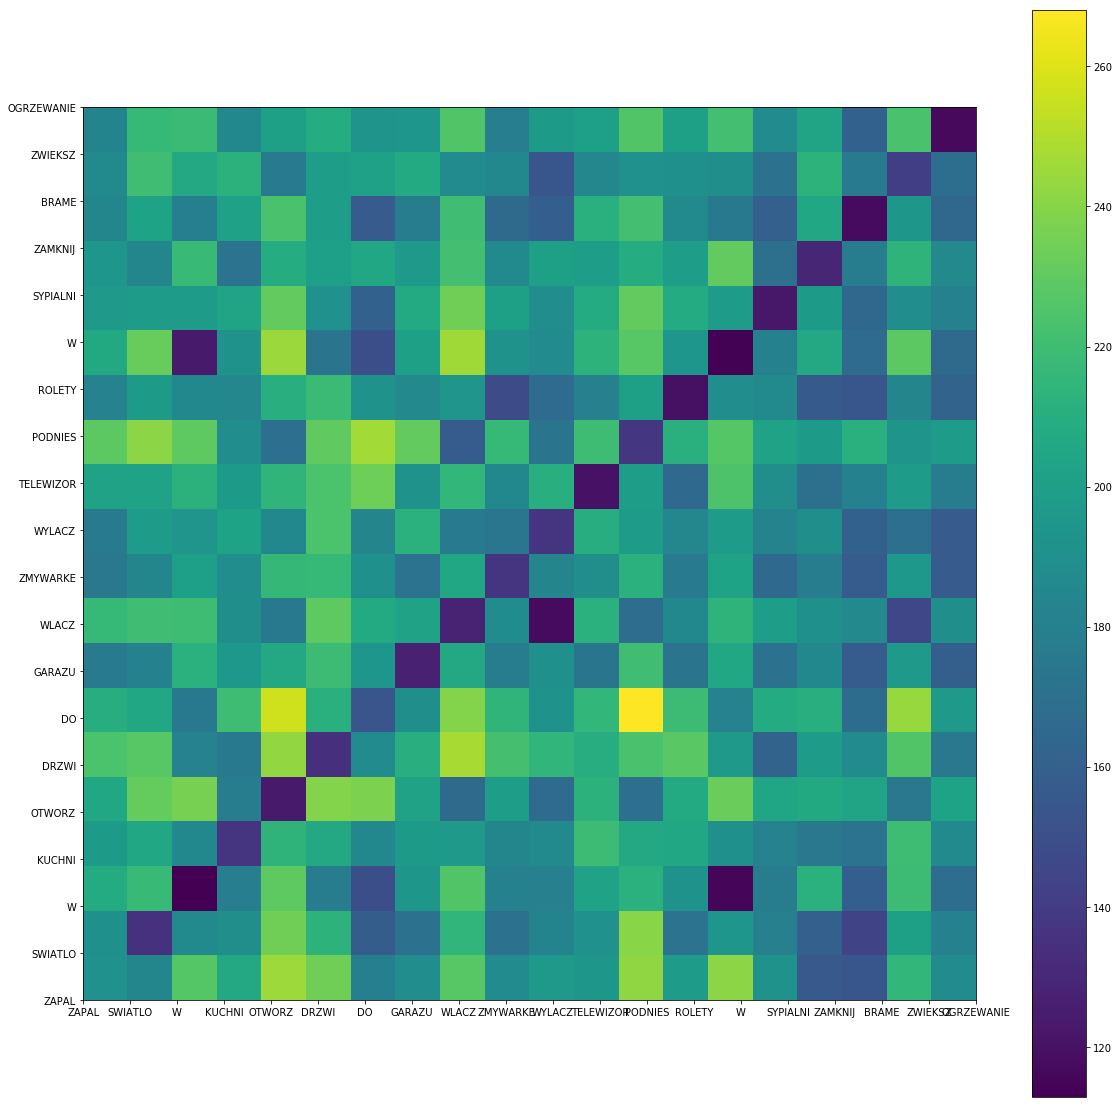

ZAPAL ==> BRAME
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> DO
GARAZU ==> GARAZU
WLACZ ==> WYLACZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> BRAME
Recognition rate: 85.0%


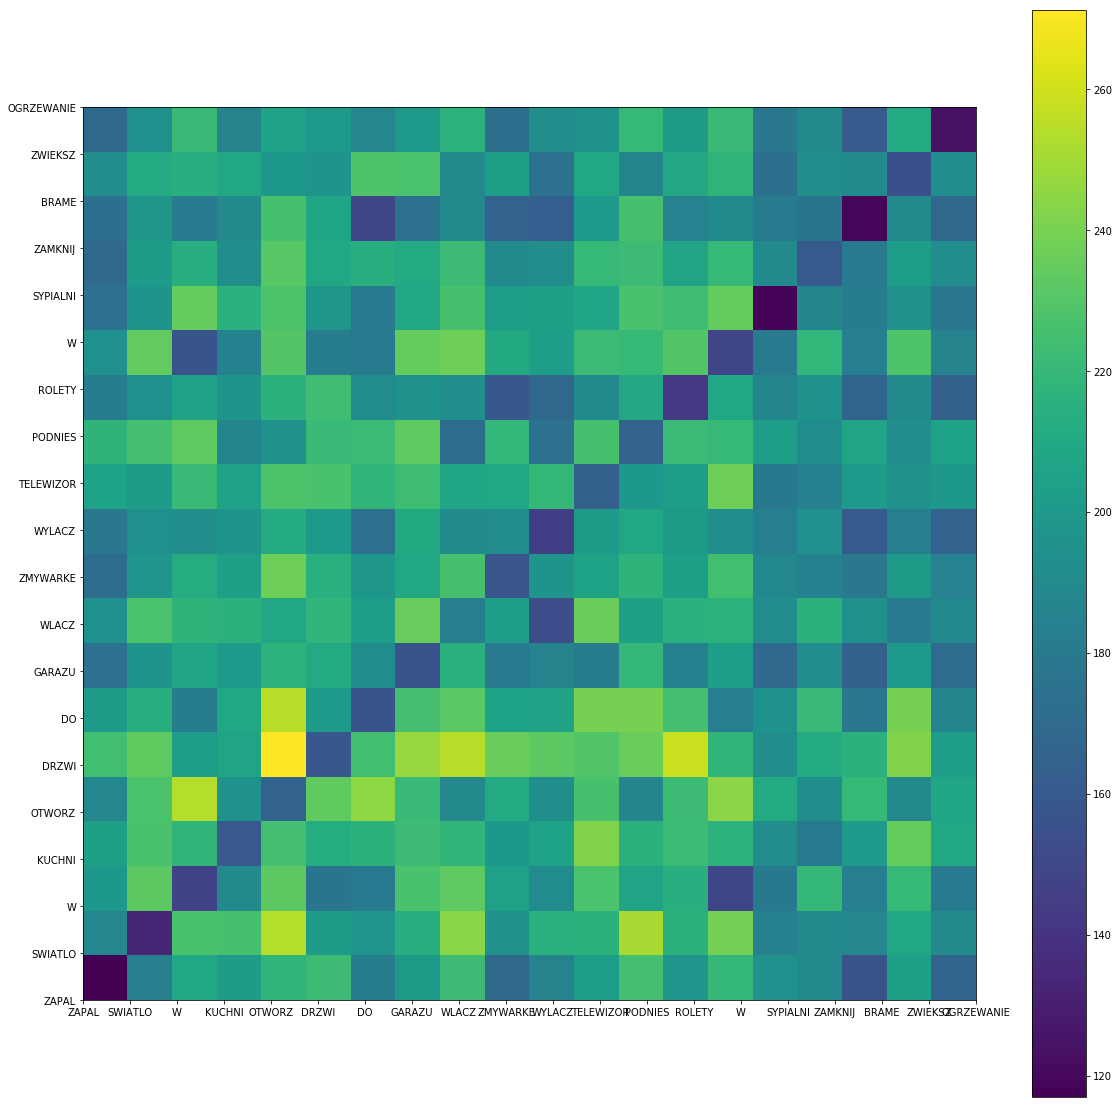

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> DO
GARAZU ==> GARAZU
WLACZ ==> WYLACZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> BRAME
Recognition rate: 90.0%


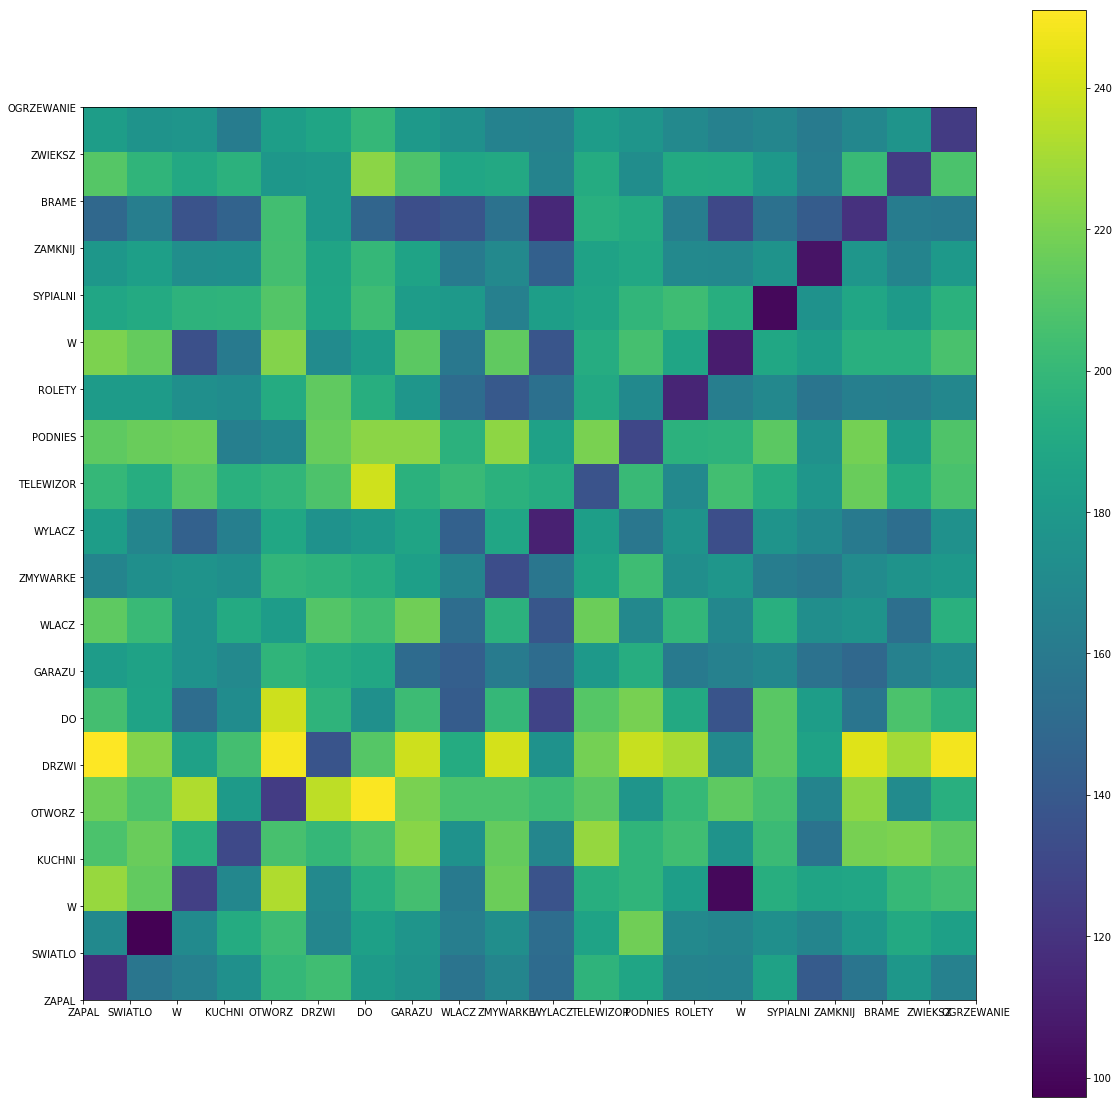

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> WYLACZ
GARAZU ==> WLACZ
WLACZ ==> WYLACZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> WYLACZ
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> ZAMKNIJ
Recognition rate: 75.0%


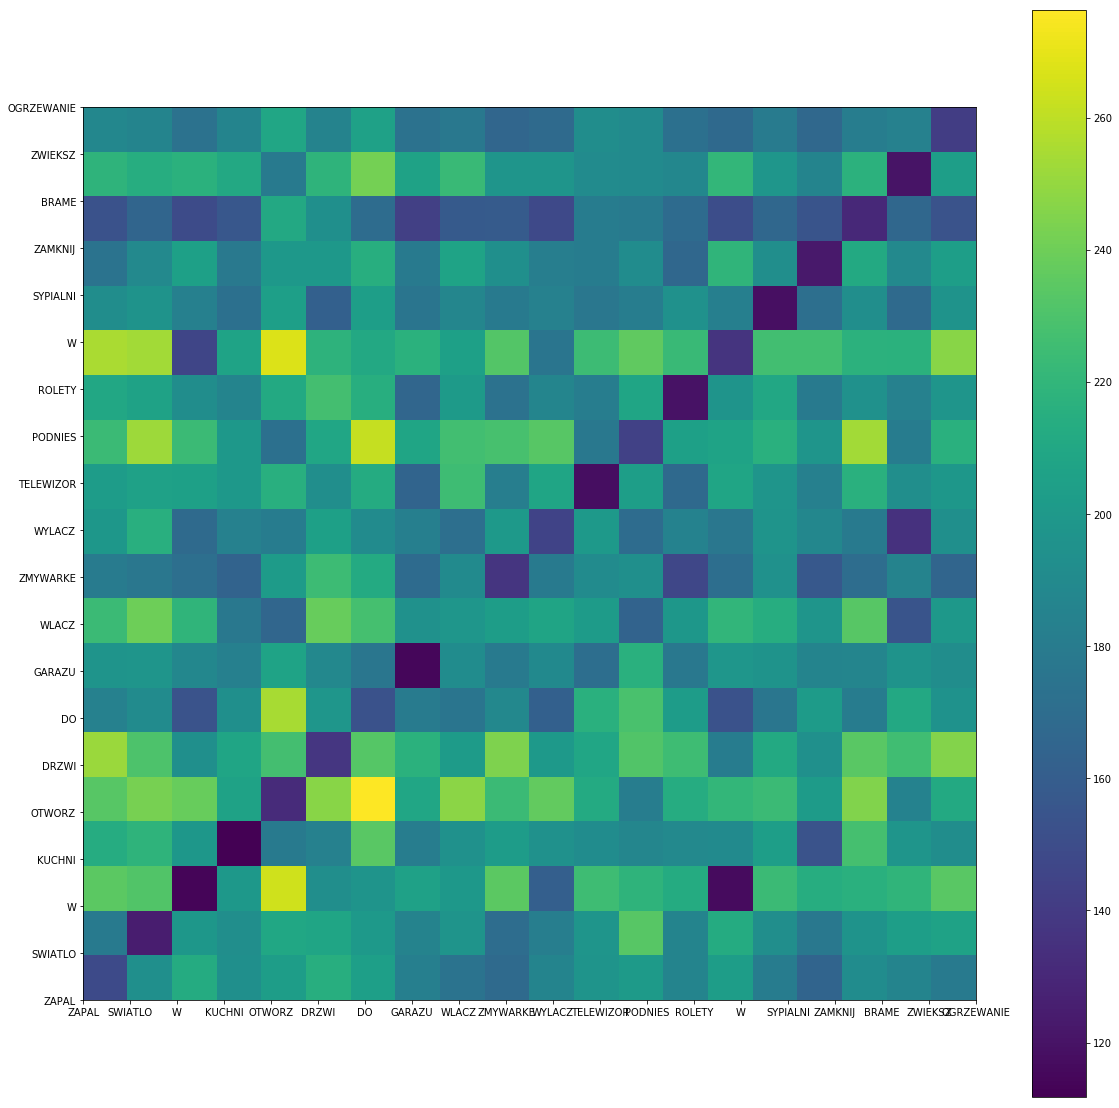

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> DO
GARAZU ==> GARAZU
WLACZ ==> ZWIEKSZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> ZWIEKSZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> ZMYWARKE
Recognition rate: 85.0%


In [17]:
file1 = "273083_23_M_10_2"
file2 = "273083_23_M_17_4"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "273083_23_M_10_2"
file2 = "273083_23_M_22_1"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "273083_23_M_13_3"
file2 = "273083_23_M_22_1"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "273083_23_M_13_3"
file2 = "273083_23_M_17_4"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "273083_23_M_22_1"
file2 = "273083_23_M_17_4"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

### Calculate recognistion rate for MFCCs of different persons

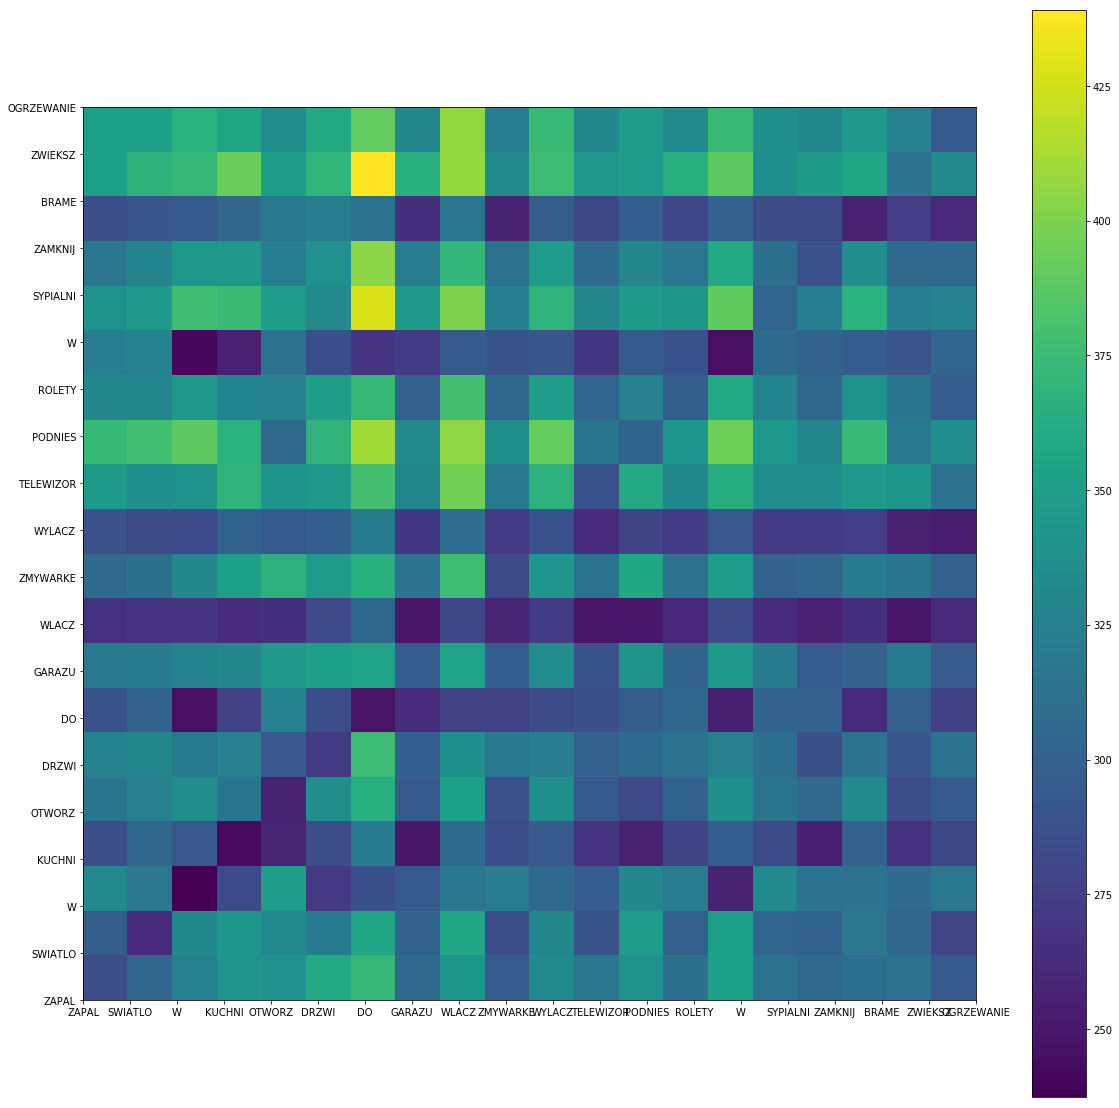

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> W
GARAZU ==> TELEWIZOR
WLACZ ==> ZWIEKSZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> ZWIEKSZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> ZMYWARKE
Recognition rate: 75.0%


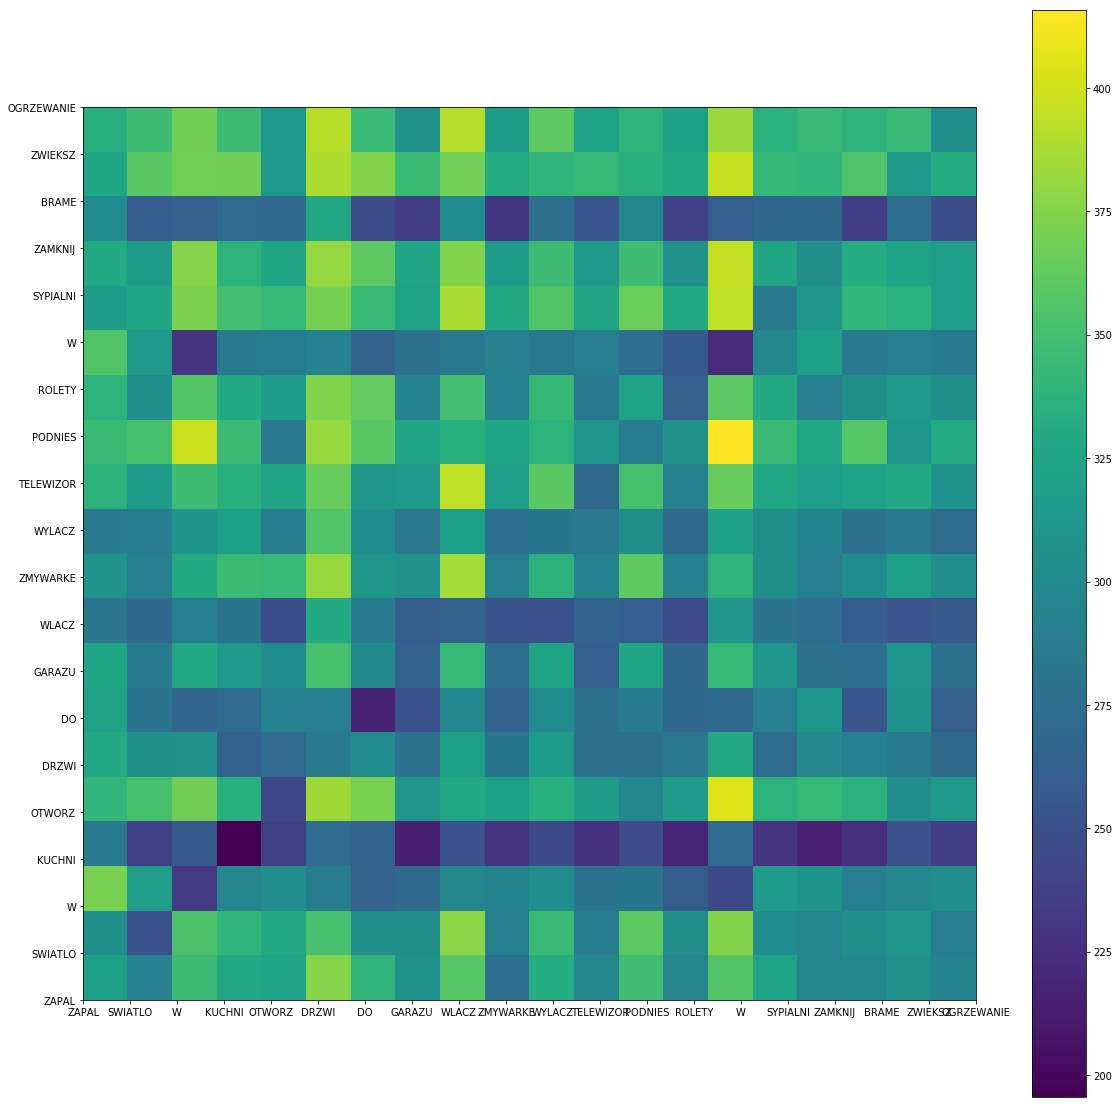

ZAPAL ==> ZMYWARKE
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> KUCHNI
DO ==> DO
GARAZU ==> TELEWIZOR
WLACZ ==> ROLETY
ZMYWARKE ==> ZAMKNIJ
WYLACZ ==> ROLETY
TELEWIZOR ==> TELEWIZOR
PODNIES ==> OTWORZ
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> ZMYWARKE
ZWIEKSZ ==> OTWORZ
OGRZEWANIE ==> GARAZU
Recognition rate: 50.0%


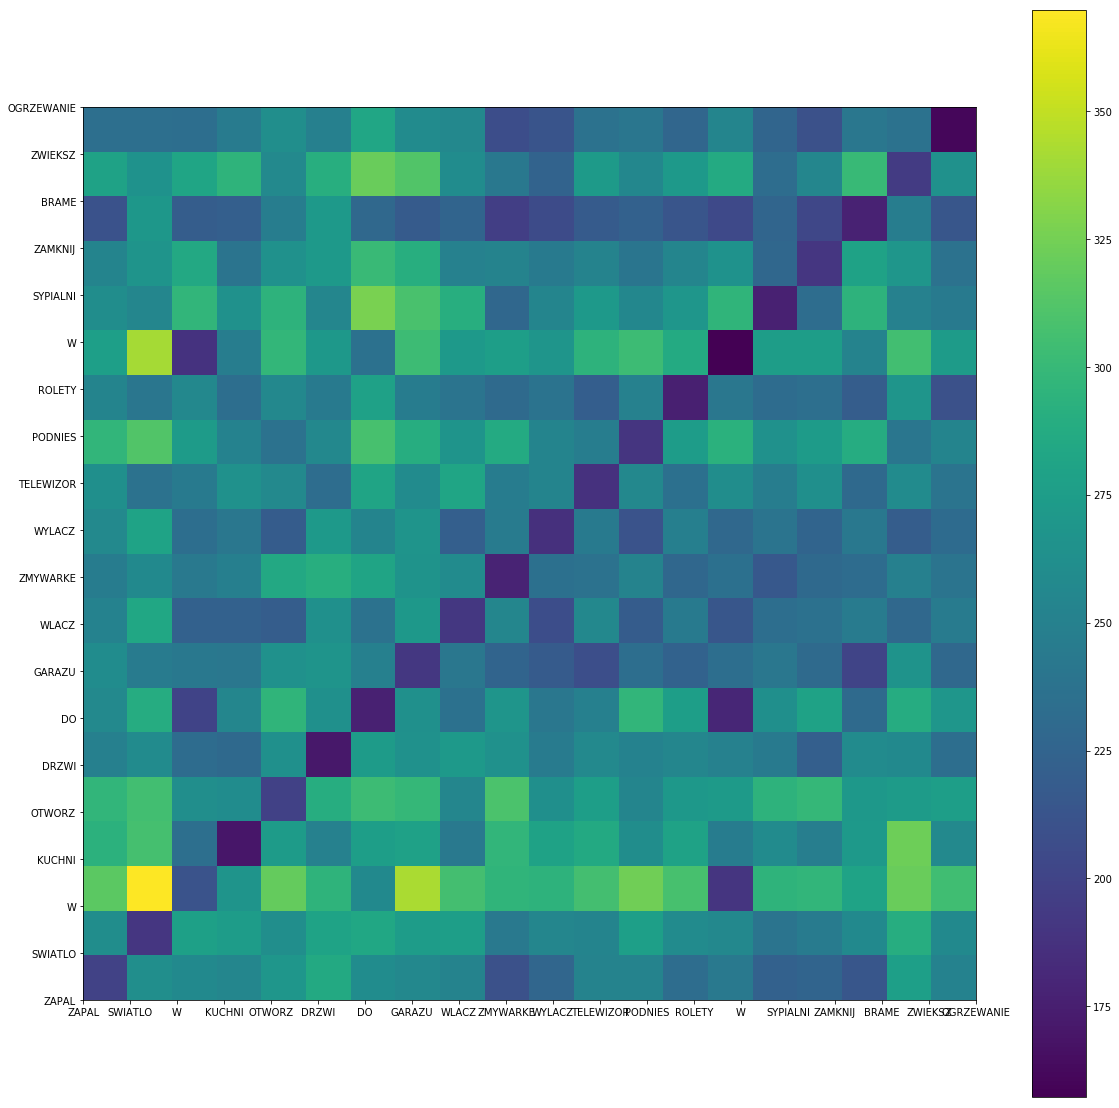

ZAPAL ==> ZAPAL
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> DO
GARAZU ==> GARAZU
WLACZ ==> WLACZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> TELEWIZOR
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> ZMYWARKE
Recognition rate: 95.0%


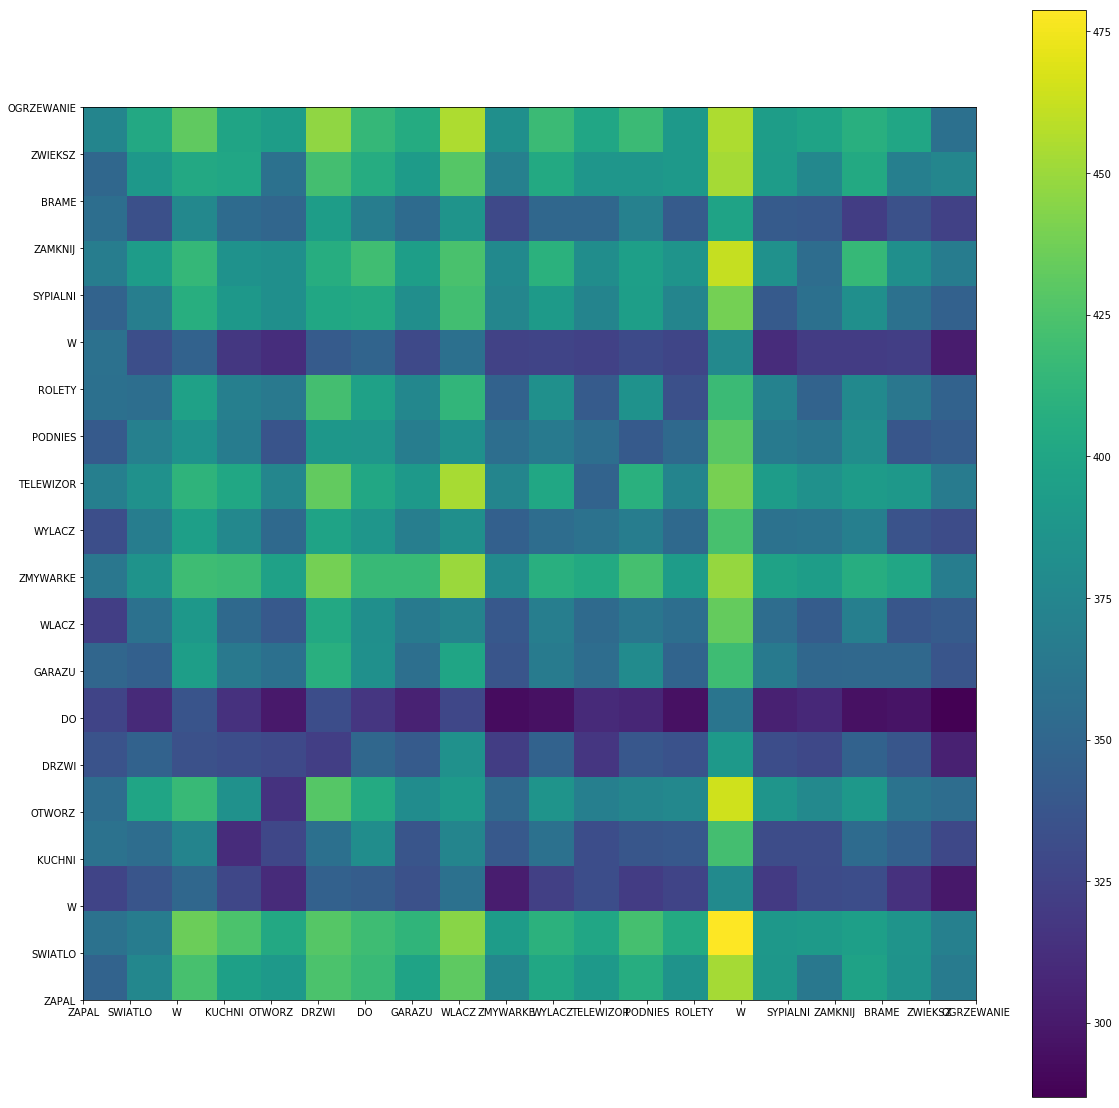

ZAPAL ==> ZAPAL
SWIATLO ==> ZAPAL
W ==> ZMYWARKE
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> TELEWIZOR
DO ==> ZMYWARKE
GARAZU ==> ZMYWARKE
WLACZ ==> ZAPAL
ZMYWARKE ==> ZAPAL
WYLACZ ==> ZAPAL
TELEWIZOR ==> TELEWIZOR
PODNIES ==> OTWORZ
ROLETY ==> ROLETY
W ==> SYPIALNI
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> BRAME
ZWIEKSZ ==> ZAPAL
OGRZEWANIE ==> ZAPAL
Recognition rate: 40.0%


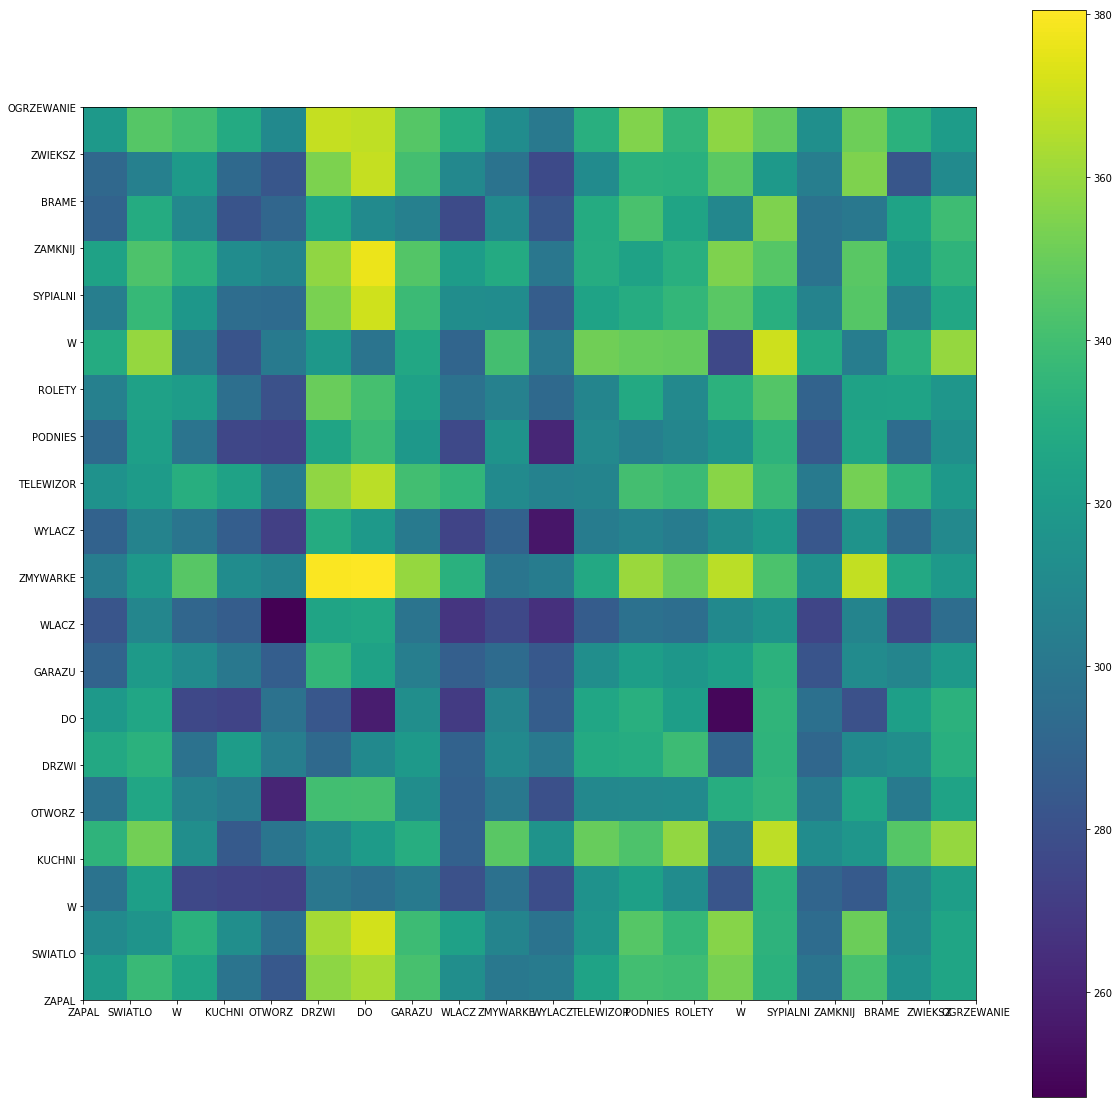

ZAPAL ==> OTWORZ
SWIATLO ==> ZAMKNIJ
W ==> OTWORZ
KUCHNI ==> KUCHNI
OTWORZ ==> OTWORZ
DRZWI ==> WLACZ
DO ==> W
GARAZU ==> ZAMKNIJ
WLACZ ==> OTWORZ
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> WYLACZ
TELEWIZOR ==> ZAMKNIJ
PODNIES ==> WYLACZ
ROLETY ==> OTWORZ
W ==> W
SYPIALNI ==> WYLACZ
ZAMKNIJ ==> ZAMKNIJ
BRAME ==> WLACZ
ZWIEKSZ ==> WYLACZ
OGRZEWANIE ==> WYLACZ
Recognition rate: 30.0%


In [22]:
file1 = "266689_23_K_12_2"
file2 = "273083_23_M_17_4"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "266689_23_K_7_1"
file2 = "273083_23_M_22_1"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "266689_23_K_12_2"
file2 = "266732_23_K_18_2"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "295812_23_M_9_1"
file2 = "273083_23_M_22_1"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

file1 = "295812_23_M_9_1"
file2 = "266766_23_K_21_1"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = compute_mfcc(file1, file2, words_analyse)
draw_matrix(mfccs1, mfccs2, words1, labels, words_analyse)
recon_rate(mfccs1, mfccs2)

### Calculate recognisition rate for other features

The result are much worse than for MFCC even for the same person

#### Calculating for RMSE

In [6]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.rmse(y1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.rmse(y2))
    
recon_rate(feat1, feat2)

ZAPAL ==> ROLETY
SWIATLO ==> ZAPAL
W ==> WLACZ
KUCHNI ==> ZAPAL
OTWORZ ==> SYPIALNI
DRZWI ==> GARAZU
DO ==> WLACZ
GARAZU ==> WLACZ
WLACZ ==> BRAME
ZMYWARKE ==> BRAME
WYLACZ ==> BRAME
TELEWIZOR ==> ZAPAL
PODNIES ==> ZAPAL
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> ROLETY
ZAMKNIJ ==> SYPIALNI
BRAME ==> ROLETY
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> ZAPAL
Recognition rate: 15.0%


#### Calculating for spectral centroid

In [16]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.spectral_centroid(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.spectral_centroid(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> BRAME
SWIATLO ==> SWIATLO
W ==> BRAME
KUCHNI ==> ROLETY
OTWORZ ==> WYLACZ
DRZWI ==> W
DO ==> BRAME
GARAZU ==> GARAZU
WLACZ ==> BRAME
ZMYWARKE ==> ROLETY
WYLACZ ==> BRAME
TELEWIZOR ==> ZMYWARKE
PODNIES ==> BRAME
ROLETY ==> SWIATLO
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> WYLACZ
BRAME ==> BRAME
ZWIEKSZ ==> PODNIES
OGRZEWANIE ==> WYLACZ
Recognition rate: 25.0%


#### Calculating using sepctral bandwidth

In [15]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.spectral_bandwidth(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.spectral_bandwidth(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> ROLETY
SWIATLO ==> SYPIALNI
W ==> BRAME
KUCHNI ==> ROLETY
OTWORZ ==> SYPIALNI
DRZWI ==> GARAZU
DO ==> BRAME
GARAZU ==> BRAME
WLACZ ==> PODNIES
ZMYWARKE ==> SYPIALNI
WYLACZ ==> ZWIEKSZ
TELEWIZOR ==> ZWIEKSZ
PODNIES ==> PODNIES
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> SYPIALNI
BRAME ==> SYPIALNI
ZWIEKSZ ==> ZWIEKSZ
OGRZEWANIE ==> GARAZU
Recognition rate: 25.0%


#### Calculating using tempogram

In [14]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.tempogram(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.tempogram(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> OTWORZ
SWIATLO ==> KUCHNI
W ==> W
KUCHNI ==> SYPIALNI
OTWORZ ==> GARAZU
DRZWI ==> DO
DO ==> DO
GARAZU ==> KUCHNI
WLACZ ==> WLACZ
ZMYWARKE ==> ROLETY
WYLACZ ==> ZWIEKSZ
TELEWIZOR ==> ZAMKNIJ
PODNIES ==> KUCHNI
ROLETY ==> DO
W ==> DO
SYPIALNI ==> ZAPAL
ZAMKNIJ ==> ZAPAL
BRAME ==> WLACZ
ZWIEKSZ ==> GARAZU
OGRZEWANIE ==> SWIATLO
Recognition rate: 15.0%


#### Calculating using spectral rolloff

In [13]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.spectral_rolloff(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.spectral_rolloff(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> TELEWIZOR
SWIATLO ==> SWIATLO
W ==> W
KUCHNI ==> SWIATLO
OTWORZ ==> SWIATLO
DRZWI ==> ZWIEKSZ
DO ==> BRAME
GARAZU ==> GARAZU
WLACZ ==> TELEWIZOR
ZMYWARKE ==> SYPIALNI
WYLACZ ==> SWIATLO
TELEWIZOR ==> ROLETY
PODNIES ==> TELEWIZOR
ROLETY ==> ROLETY
W ==> W
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> SWIATLO
BRAME ==> DO
ZWIEKSZ ==> WYLACZ
OGRZEWANIE ==> WYLACZ
Recognition rate: 30.0%


#### Calculating using chroma stft

In [12]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.chroma_stft(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.chroma_stft(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> ZAMKNIJ
SWIATLO ==> ZAPAL
W ==> SWIATLO
KUCHNI ==> SWIATLO
OTWORZ ==> DO
DRZWI ==> W
DO ==> W
GARAZU ==> SWIATLO
WLACZ ==> DO
ZMYWARKE ==> SWIATLO
WYLACZ ==> W
TELEWIZOR ==> SWIATLO
PODNIES ==> ZAPAL
ROLETY ==> SWIATLO
W ==> W
SYPIALNI ==> SWIATLO
ZAMKNIJ ==> SWIATLO
BRAME ==> W
ZWIEKSZ ==> W
OGRZEWANIE ==> SWIATLO
Recognition rate: 5.0%


#### Calculating using poly features

In [17]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.poly_features(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.poly_features(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> ZAPAL
SWIATLO ==> ZAPAL
W ==> BRAME
KUCHNI ==> ROLETY
OTWORZ ==> OTWORZ
DRZWI ==> GARAZU
DO ==> BRAME
GARAZU ==> BRAME
WLACZ ==> PODNIES
ZMYWARKE ==> BRAME
WYLACZ ==> GARAZU
TELEWIZOR ==> ZAPAL
PODNIES ==> GARAZU
ROLETY ==> BRAME
W ==> WLACZ
SYPIALNI ==> SYPIALNI
ZAMKNIJ ==> ZWIEKSZ
BRAME ==> SYPIALNI
ZWIEKSZ ==> WYLACZ
OGRZEWANIE ==> BRAME
Recognition rate: 15.0%


#### Calculating using tonnetz

In [18]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.tonnetz(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.tonnetz(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> SWIATLO
SWIATLO ==> W
W ==> ZAPAL
KUCHNI ==> SWIATLO
OTWORZ ==> OTWORZ
DRZWI ==> DRZWI
DO ==> DRZWI
GARAZU ==> PODNIES
WLACZ ==> DRZWI
ZMYWARKE ==> ZMYWARKE
WYLACZ ==> DRZWI
TELEWIZOR ==> OTWORZ
PODNIES ==> SWIATLO
ROLETY ==> OTWORZ
W ==> PODNIES
SYPIALNI ==> PODNIES
ZAMKNIJ ==> ZAPAL
BRAME ==> DRZWI
ZWIEKSZ ==> DRZWI
OGRZEWANIE ==> SWIATLO
Recognition rate: 15.0%


#### Calculating using chroma cqt

In [19]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.chroma_cqt(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.chroma_cqt(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> ZAPAL
SWIATLO ==> ZAPAL
W ==> DRZWI
KUCHNI ==> SWIATLO
OTWORZ ==> ZAPAL
DRZWI ==> DRZWI
DO ==> DRZWI
GARAZU ==> DRZWI
WLACZ ==> DRZWI
ZMYWARKE ==> ZAPAL
WYLACZ ==> DRZWI
TELEWIZOR ==> ZAPAL
PODNIES ==> SWIATLO
ROLETY ==> SWIATLO
W ==> DRZWI
SYPIALNI ==> DRZWI
ZAMKNIJ ==> W
BRAME ==> W
ZWIEKSZ ==> DRZWI
OGRZEWANIE ==> ZAPAL
Recognition rate: 10.0%


#### Calculating using chroma cens

In [20]:
feat1 = []
feat2 = []

for i in range(words_analyse) :
    y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
    feat1.append(librosa.feature.chroma_cens(y1, sr1))
    y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
    feat2.append(librosa.feature.chroma_cens(y2, sr2))
    
recon_rate(feat1, feat2)

ZAPAL ==> SWIATLO
SWIATLO ==> SWIATLO
W ==> ZAPAL
KUCHNI ==> SWIATLO
OTWORZ ==> ZAPAL
DRZWI ==> DRZWI
DO ==> DRZWI
GARAZU ==> DRZWI
WLACZ ==> DRZWI
ZMYWARKE ==> ZAPAL
WYLACZ ==> DRZWI
TELEWIZOR ==> SWIATLO
PODNIES ==> SWIATLO
ROLETY ==> ZAPAL
W ==> DRZWI
SYPIALNI ==> ZAPAL
ZAMKNIJ ==> ZAPAL
BRAME ==> ZAPAL
ZWIEKSZ ==> OTWORZ
OGRZEWANIE ==> ZAPAL
Recognition rate: 10.0%
